# Check `GDS` stack

This notebook checks all software requirements for the course Geographic Data Science are correctly installed. 

A successful run of the notebook implies no errors returned in any cell *and* every cell beyond the first one returning a printout of `True`. This ensures a correct environment installed.

In [1]:
import pandas as pd

In [2]:
import matplotlib as mpl

In [3]:
import seaborn as sns

In [4]:
import geopandas as gpd

In [5]:
import pysal as ps

In [6]:
import cartopy as cp

In [7]:
import pyproj

In [8]:
import geopy

In [9]:
import sklearn

In [10]:
import bokeh

In [11]:
import mplleaflet

In [12]:
import datashader

In [13]:
import geojson

In [14]:
import folium

In [15]:
import statsmodels.api as sm

In [16]:
import xlrd

In [17]:
import xlsxwriter

# Test

In [18]:
shp = ps.examples.get_path('columbus.shp')
db = gpd.read_file(shp)
db.head()

,AREA,COLUMBUS_,COLUMBUS_I,CP,CRIME,DISCBD,EW,HOVAL,INC,NEIG,...,NSA,NSB,OPEN,PERIMETER,PLUMB,POLYID,THOUS,X,Y,geometry
0,0.309441,2.0,5.0,0.0,15.725980,5.03,1.0,80.467003,19.531,5,...,1.0,1.0,2.850747,2.440629,0.217155,1.0,1000.0,38.799999,44.070000,"POLYGON ((8.624129295349121 14.23698043823242,..."
1,0.259329,3.0,1.0,0.0,18.801754,4.27,0.0,44.567001,21.232,1,...,1.0,1.0,5.296720,2.236939,0.320581,2.0,1000.0,35.619999,42.380001,"POLYGON ((8.252790451049805 14.23694038391113,..."
2,0.192468,4.0,6.0,0.0,30.626781,3.89,1.0,26.350000,15.956,6,...,1.0,1.0,4.534649,2.187547,0.374404,3.0,1000.0,39.820000,41.180000,"POLYGON ((8.653305053710938 14.00809001922607,..."
3,0.083841,5.0,2.0,0.0,32.387760,3.70,0.0,33.200001,4.477,2,...,1.0,1.0,0.394427,1.427635,1.186944,4.0,1000.0,36.500000,40.520000,"POLYGON ((8.459499359130859 13.82034969329834,..."
4,0.488888,6.0,7.0,0.0,50.731510,2.83,1.0,23.225000,11.252,7,...,1.0,1.0,0.405664,2.997133,0.624596,5.0,1000.0,40.009998,38.000000,"POLYGON ((8.685274124145508 13.63951969146729,..."


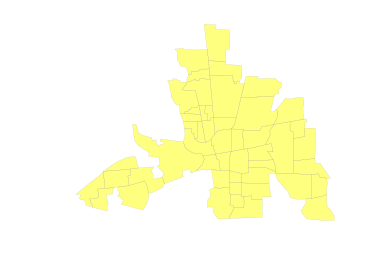

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(1)
for poly in db['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, facecolor='yellow', edgecolor='grey', linewidth=0.1)
ax.set_axis_off()
plt.show()

In [20]:
db.crs['init'] = 'epsg:26918'

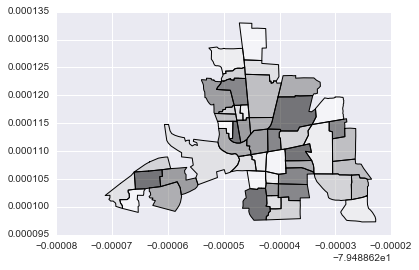

In [21]:
db_wgs84 = db.to_crs(epsg=4326)
db_wgs84.plot()
plt.show()

/Users/dani/anaconda/envs/gds-scipy16/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


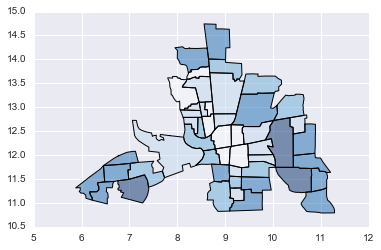

In [22]:
db.plot(column='INC', scheme='fisher_jenks', colormap=plt.matplotlib.cm.Blues)
plt.show()